In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/h_varied_potential_symmetrization.csv')
df.head()

,h,displacement_key,mean_abs_err,max_abs_diff,mean_rel_err
0,0.14,1|z|+,0.236298,1.051502,0.778213
1,0.14,1|y|-,0.236298,1.051533,0.778252
2,0.14,1|x|+,0.236298,1.051352,0.778449
3,0.14,1|y|+,0.236298,1.051504,0.778173
4,0.14,1|x|-,0.236298,1.051287,0.778345


## Grid spacing

### Eq Potential

#### Same Grid

In [3]:
df_eq = df[df['displacement_key'] == 'eq']
df_eq = df_eq.sort_values('h')
df_eq.head()

,h,displacement_key,mean_abs_err,max_abs_diff,mean_rel_err
34,0.12,eq,0.000078,0.003124,0.000590
21,0.13,eq,0.000121,0.003626,0.000596
8,0.14,eq,0.000155,0.006106,0.001245
47,0.15,eq,0.000200,0.007671,0.000976
112,0.16,eq,0.000261,0.004739,0.000952


In [4]:
def plot(df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot h vs mean_abs_err
    axes[0].plot(df['h'], df['mean_abs_err'], marker='o', color='blue')
    axes[0].set_xlabel('h')
    axes[0].set_ylabel('Mean Absolute Error')
    axes[0].set_title('h vs Mean Abs Error')
    axes[0].grid(True)
    
    # Plot h vs max_abs_diff
    axes[1].plot(df['h'], df['max_abs_diff'], marker='o', color='red')
    axes[1].set_xlabel('h')
    axes[1].set_ylabel('Max Absolute Difference')
    axes[1].set_title('h vs Max Abs Diff')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()


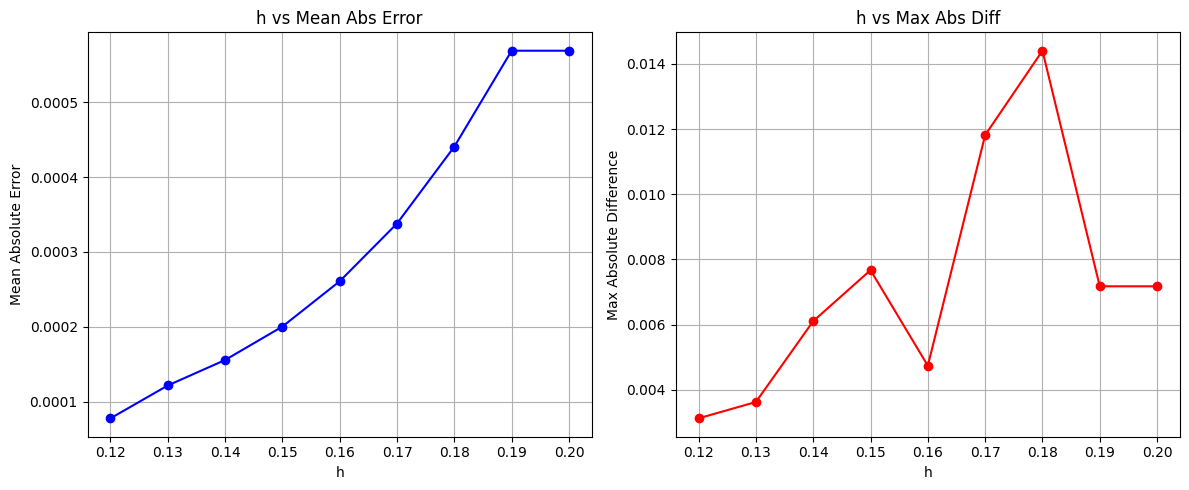

In [5]:
plot(df_eq)

#### Grid Interpolation

In [6]:
df_inter = pd.read_csv('./data/h_varied_potential_symmetrization_interpolated.csv')
df_inter.head()

,h,displacement_key,mean_abs_err,max_abs_diff,mean_rel_err
0,0.14,1|z|+,0.237105,1.050734,0.818224
1,0.14,1|y|-,0.237105,1.050733,0.833206
2,0.14,1|x|+,0.237105,1.050448,0.819282
3,0.14,1|y|+,0.237105,1.050723,0.818282
4,0.14,1|x|-,0.237105,1.050463,0.812015


In [7]:
df_eq_inter = df_inter[df_inter['displacement_key'] == 'eq']
df_eq_inter = df_eq_inter.sort_values('h')
df_eq_inter.head()

,h,displacement_key,mean_abs_err,max_abs_diff,mean_rel_err
21,0.13,eq,0.007079,0.067804,0.152737
8,0.14,eq,0.011241,0.105115,0.268805
34,0.15,eq,0.015924,0.147079,0.355697
99,0.16,eq,0.021231,0.200654,2.127584
47,0.17,eq,0.027283,0.253218,0.770325


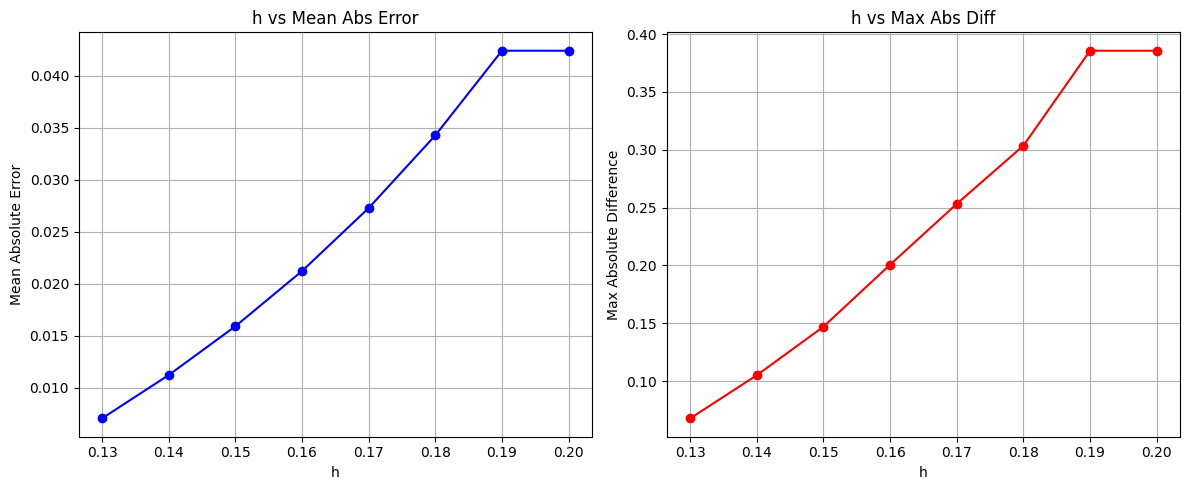

In [8]:
plot(df_eq_inter)

### Displaced Potential

In [18]:
df_dis = df[df['displacement_key'] == '1|z|-']
df_dis.head()

,h,displacement_key,mean_abs_err,max_abs_diff,mean_rel_err
5,0.14,1|z|-,0.236298,1.051528,0.778240
18,0.13,1|z|-,0.236290,1.048291,0.778063
31,0.12,1|z|-,0.236306,1.050488,0.778001
44,0.15,1|z|-,0.236300,1.051983,0.777871
57,0.17,1|z|-,0.236314,1.053518,0.777816


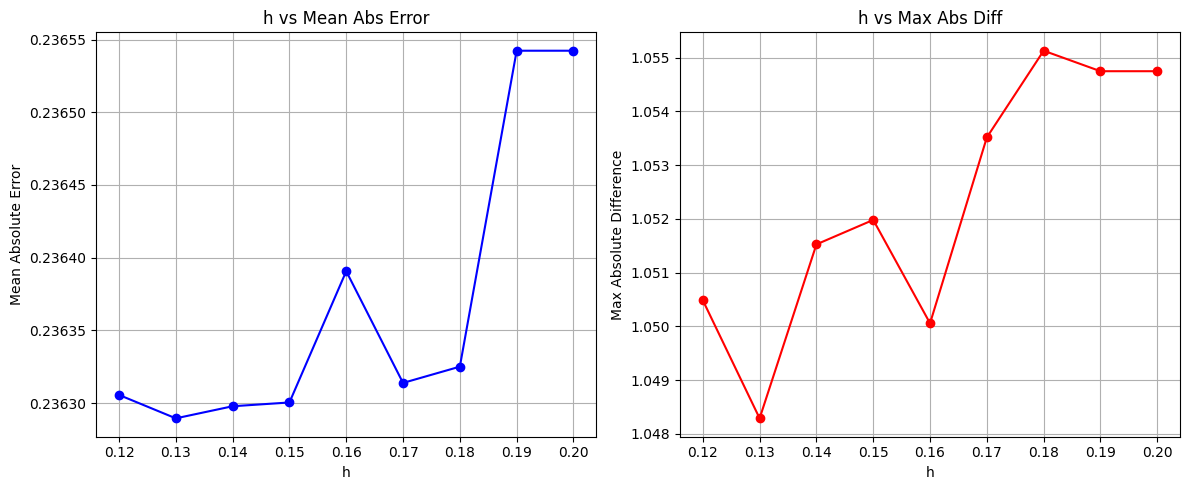

In [19]:
agg_dis = df_dis.groupby('h').agg(
    mean_abs_err=('mean_abs_err', 'mean'),
    mean_rel_err=('mean_rel_err', 'mean'),
    max_abs_diff=('max_abs_diff', 'max'),
).reset_index()

agg_dis = agg_dis.sort_values('h')
plot(agg_dis)

## Density 

In [11]:
df_dens = pd.read_csv('./data/d_varied_potential_symmetrization.csv')
df_dens = df_dens.sort_values('d')
df_dens.head(100)

,d,displacement_key,mean_abs_err,max_abs_diff,mean_rel_err
2,1.000000e-07,eq,0.000569,0.007175,0.002258
3,1.000000e-06,eq,0.000569,0.007175,0.002258
4,1.000000e-05,eq,0.000569,0.007175,0.002258
0,1.000000e-04,eq,0.000569,0.007170,0.002257
1,1.000000e-03,eq,0.000572,0.007289,0.002379
5,1.000000e-02,eq,0.000572,0.007293,0.002381


In [14]:
def plot_densisty(df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Ensure sorted by d for nicer plotting
    df = df.sort_values("d")

    # --- Plot d vs mean_abs_err ---
    axes[0].plot(df['d'], df['mean_abs_err'], marker='o')
    axes[0].set_xscale('log')
    # axes[0].set_yscale('log')
    axes[0].set_xlabel('d (log scale)')
    axes[0].set_ylabel('Mean Absolute Error (log scale)')
    axes[0].set_title('d vs Mean Abs Error (log–log)')
    axes[0].grid(True, which='both', ls=':')

    # --- Plot d vs max_abs_diff ---
    axes[1].plot(df['d'], df['max_abs_diff'], marker='o')
    axes[1].set_xscale('log')
    # axes[1].set_yscale('log')
    axes[1].set_xlabel('d (log scale)')
    axes[1].set_ylabel('Max Absolute Difference (log scale)')
    axes[1].set_title('d vs Max Abs Diff (log–log)')
    axes[1].grid(True, which='both', ls=':')

    plt.tight_layout()
    plt.show()


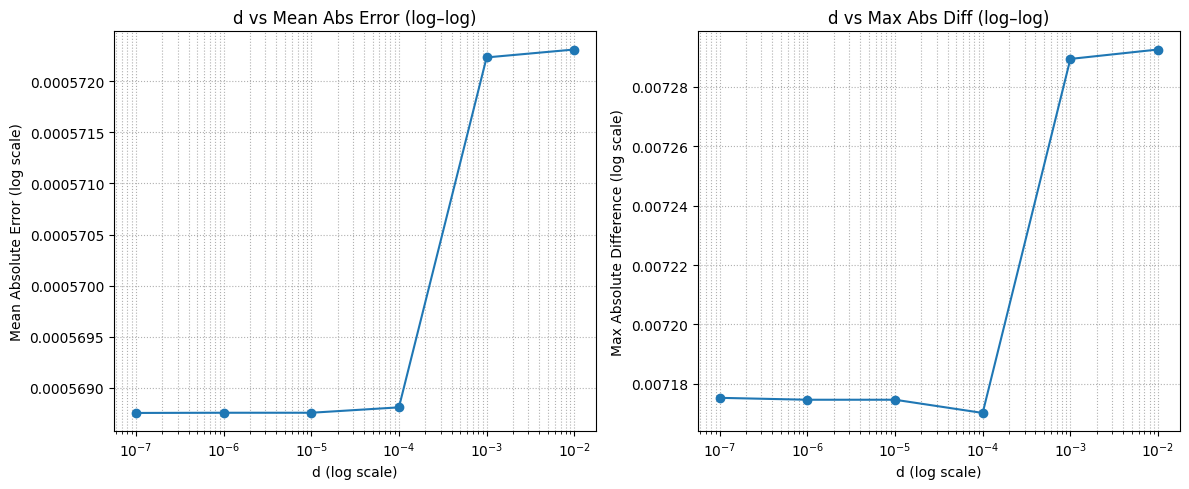

In [15]:
plot_densisty(df_dens)